In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
from pathlib import Path

In [15]:
#Folder to store project images for presentation file

IMAGES_PATH = Path() / "images" / "house_price_prediction_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
#Defining the default font sizes to plot figures
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Data Collection and Inspection

In [17]:
House_price_df = pd.read_csv("Housing.csv") #Load dataset

In [18]:
House_price_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [19]:
# Check for missing values
print(House_price_df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [20]:
# Check data types
print(House_price_df.dtypes)

# Convert categorical variables to category data type
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
House_price_df[categorical_columns] = House_price_df[categorical_columns].astype('category')

# Verify the conversion
print(House_price_df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


In [21]:
# Convert all string values in categorical columns to lowercase
House_price_df[categorical_columns] = House_price_df[categorical_columns].apply(lambda x: x.str.lower())

# Verify the conversion
print(House_price_df[categorical_columns].head())

  mainroad guestroom basement hotwaterheating airconditioning prefarea  \
0      yes        no       no              no             yes      yes   
1      yes        no       no              no             yes       no   
2      yes        no      yes              no              no      yes   
3      yes        no      yes              no             yes      yes   
4      yes       yes      yes              no             yes       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


### Exploratory Data Analysis (EDA)

In [25]:
print(House_price_df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


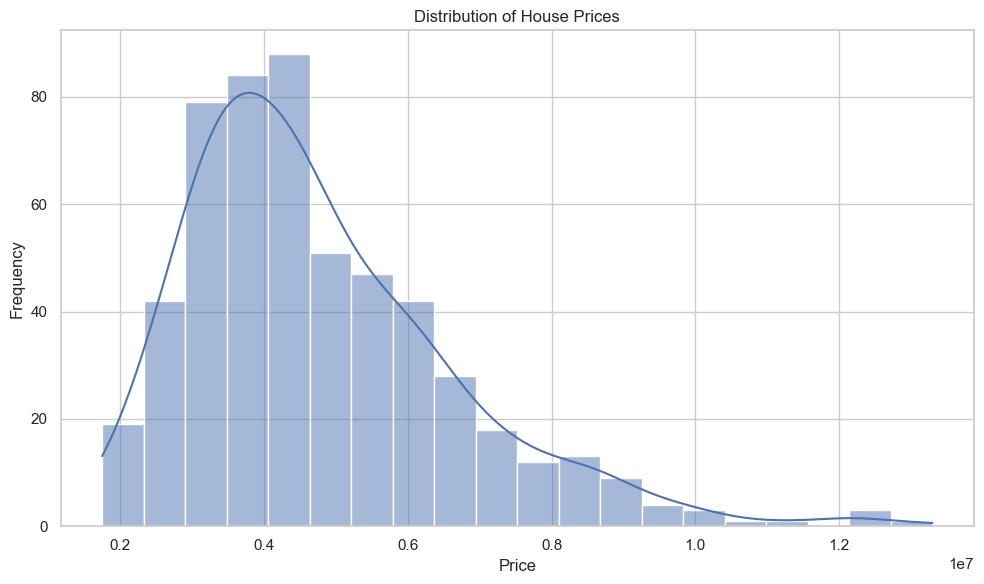

In [30]:
# Distribution of the target variable 'price'

# Function to calculate the Freedman-Diaconis bin width
def freedman_diaconis_bin_width(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(data))
    return bin_width

# Calculate the bin width for the price column
bin_width = freedman_diaconis_bin_width(House_price_df['price'])
num_bins = int((House_price_df['price'].max() - House_price_df['price'].min()) / bin_width)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(House_price_df['price'], bins=num_bins, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
save_fig("price_distribution_adjusted")
plt.show()


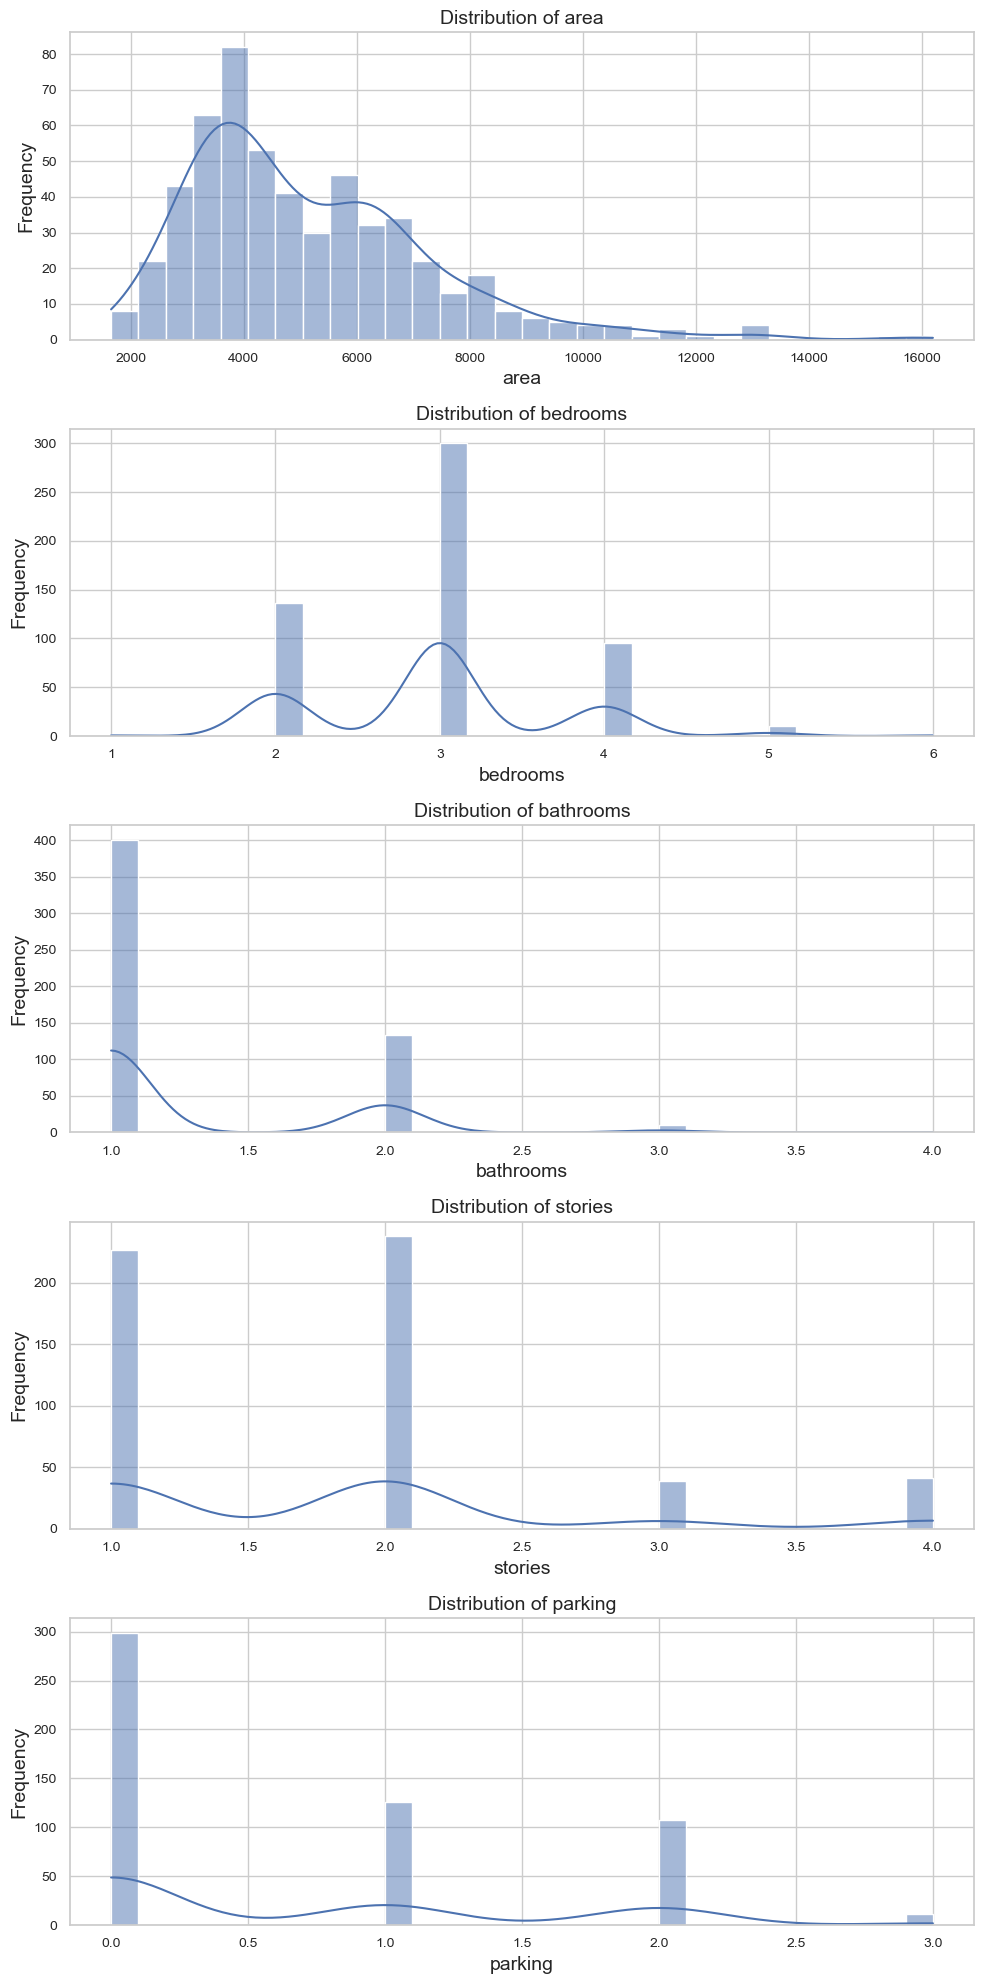

In [24]:
# Distribution of numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    sns.histplot(House_price_df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
# Calculate the bin width for the price column using Freedman-Diaconis rule
def freedman_diaconis_bin_width(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(data))
    return bin_width

bin_width = freedman_diaconis_bin_width(House_price_df['price'])
num_bins = int((House_price_df['price'].max() - House_price_df['price'].min()) / bin_width)

# Create an interactive histogram using Altair
hist = alt.Chart(House_price_df).mark_bar().encode(
    alt.X('price:Q', bin=alt.Bin(maxbins=num_bins), title='Price'),
    alt.Y('count()', title='Frequency'),
    tooltip=['count()']
).properties(
    title='Distribution of House Prices',
    width=600,
    height=400
).interactive()

# Display the histogram
hist.show()

alt.Chart(...)

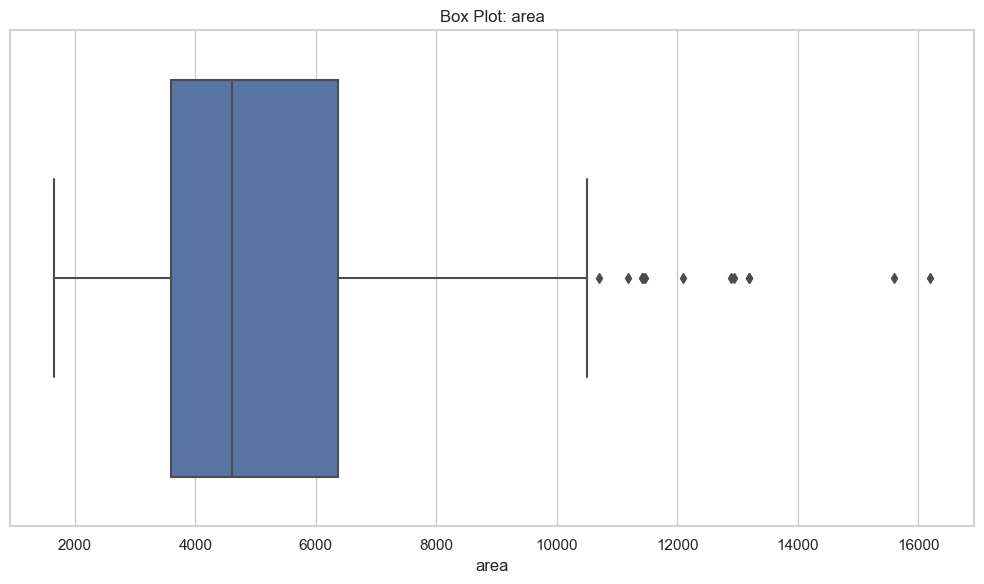

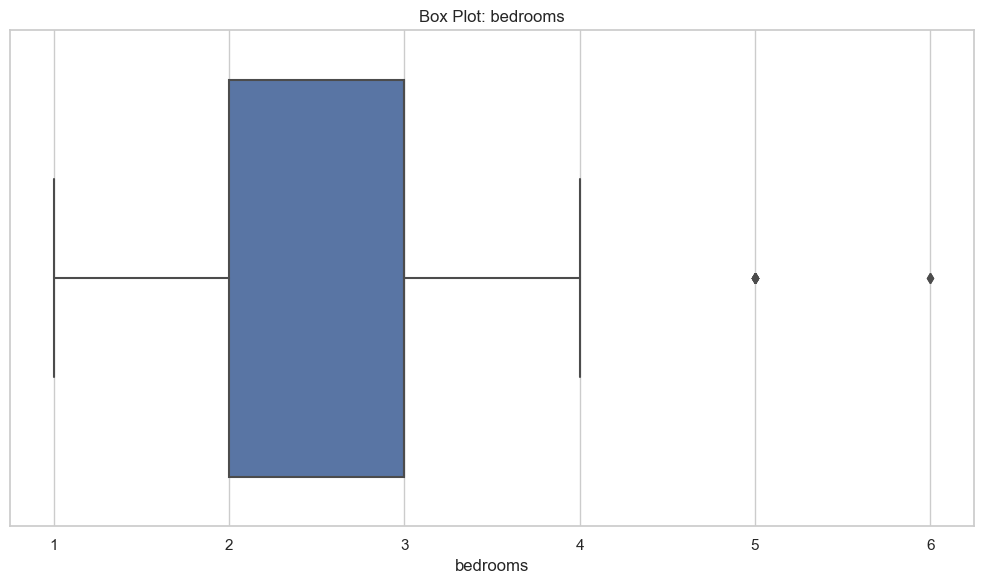

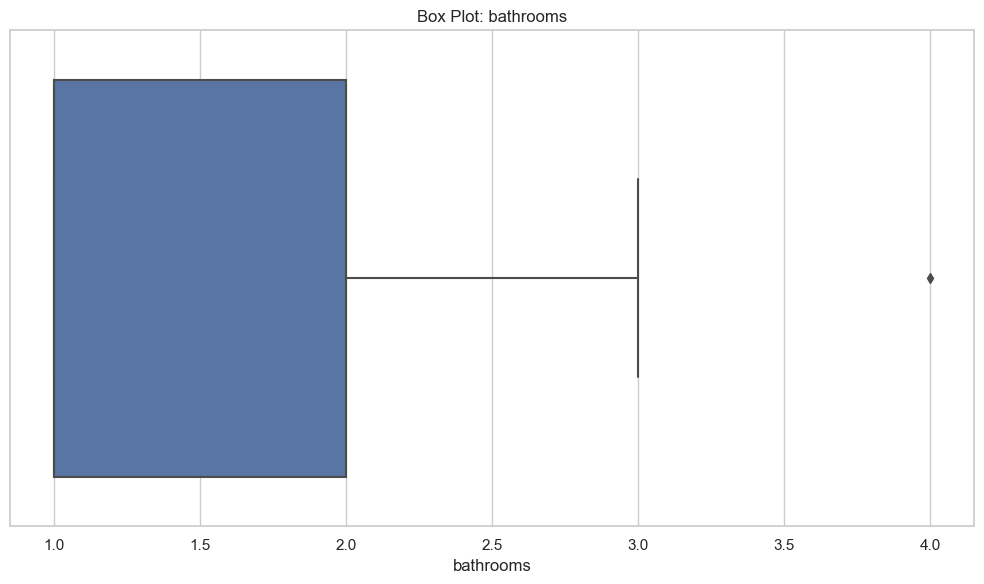

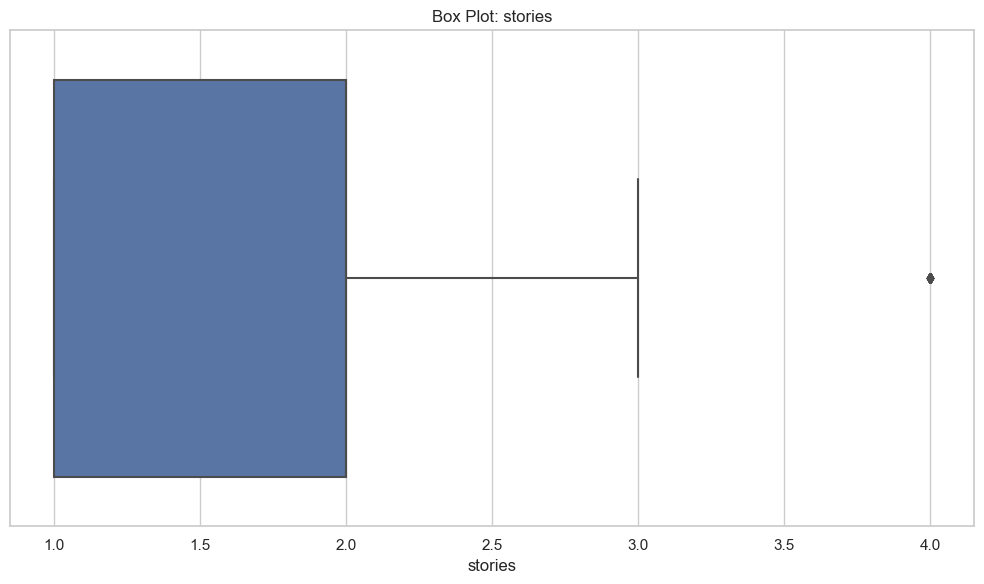

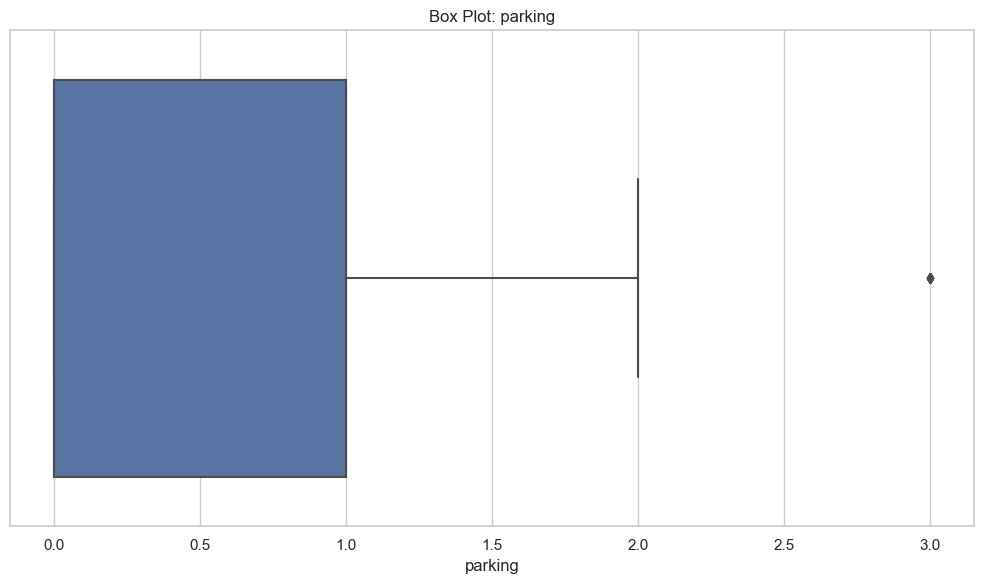

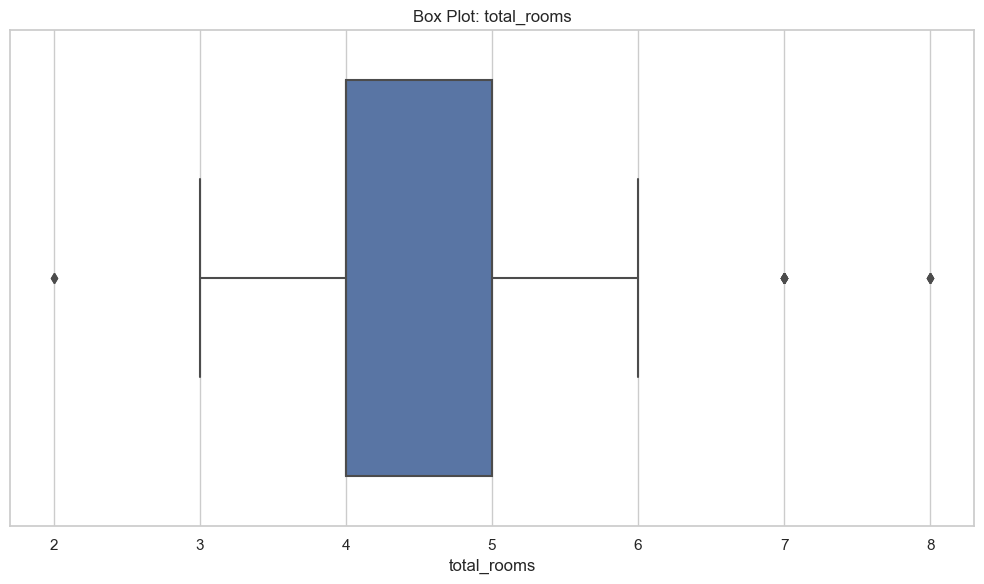

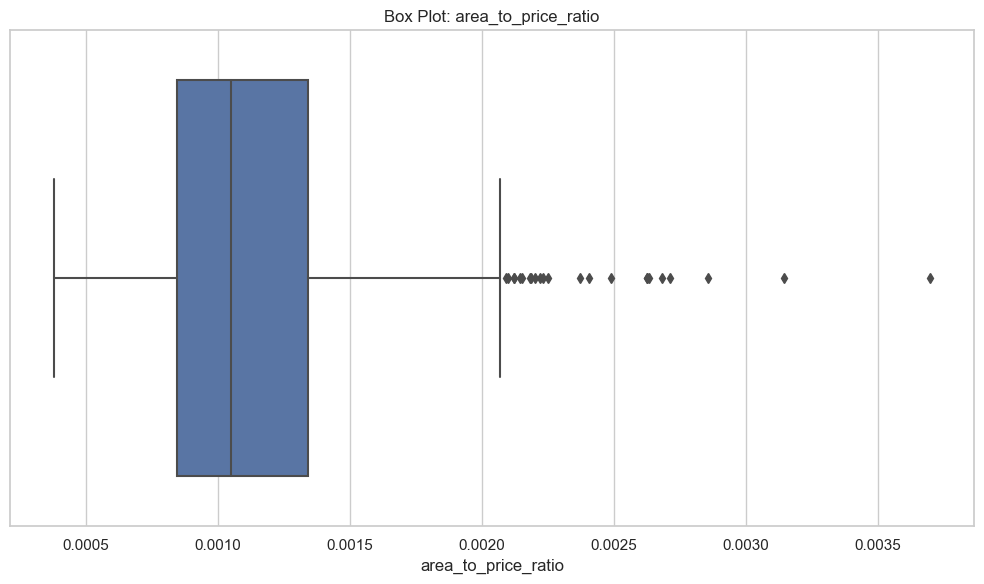

In [40]:
# Identify outliers using box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=House_price_df[feature])
    plt.title(f'Box Plot: {feature}')
    plt.xlabel(feature)
    save_fig(f"{feature}_boxplot")
    plt.show()

# Handling outliers: For simplicity, let's remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the numerical features
for feature in numerical_features:
    House_price_df = remove_outliers(House_price_df, feature)

### Feature Engineering

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
# Task 3.1: Create new features
House_price_df['total_rooms'] = House_price_df['bedrooms'] + House_price_df['bathrooms']
House_price_df['area_to_price_ratio'] = House_price_df['area'] / House_price_df['price']

In [34]:
# Task 3.2: Encode categorical variables
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'total_rooms', 'area_to_price_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [35]:
# Apply the transformations
House_price_prepared = preprocessor.fit_transform(House_price_df)

In [36]:
# Convert the preprocessed data back to a DataFrame
encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(encoded_features)
House_price_prepared_df = pd.DataFrame(House_price_prepared, columns=all_features)

In [37]:
# Add the target variable back to the DataFrame
House_price_prepared_df['price'] = House_price_df['price'].values

In [38]:
# Save the DataFrame to a CSV file
House_price_prepared_df.to_csv(IMAGES_PATH / "house_price_prepared.csv", index=False)

# Display the first few rows of the prepared DataFrame
House_price_prepared_df.head()

,area,bedrooms,bathrooms,stories,parking,total_rooms,area_to_price_ratio,mainroad_no,mainroad_yes,guestroom_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,1.046726,1.403419,1.421812,1.378217,1.517692,1.688416,-1.330843,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13300000
1,1.757010,1.403419,5.405809,2.532024,2.679409,3.619554,-0.934720,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,12250000
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.722848,-0.748379,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12250000
3,1.083624,1.403419,1.421812,0.224410,2.679409,1.688416,-1.202775,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,12215000
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.722848,-1.119896,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,11410000


In [39]:
House_price_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,area_to_price_ratio
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6,0.000558
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8,0.000731
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5,0.000813
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6,0.000614
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5,0.000650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3,0.001648
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,4,0.001358
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,3,0.002069
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,4,0.001663


In [41]:
all_features

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'total_rooms',
 'area_to_price_ratio',
 'mainroad_no',
 'mainroad_yes',
 'guestroom_no',
 'guestroom_yes',
 'basement_no',
 'basement_yes',
 'hotwaterheating_no',
 'hotwaterheating_yes',
 'airconditioning_no',
 'airconditioning_yes',
 'prefarea_no',
 'prefarea_yes',
 'furnishingstatus_furnished',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [ ]:
**Price:** The range is quite large compared to other features, so scaling can help normalize its impact.

In [ ]:
House_price_weighted_scaled_df = pd.DataFrame(scaler.fit_transform(House_price_weighted_df),columns = House_price_weighted_df.columns)